In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = '/content/drive/My Drive/StudentPerformanceFactors.csv'
df = pd.read_csv(file_path)
df.head()

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70


# HANDLE MISSING VALUES

In [ ]:
# Check for missing values in each column
df.isnull().sum()

,0
Hours_Studied,0
Attendance,0
Parental_Involvement,0
Access_to_Resources,0
Extracurricular_Activities,0
Sleep_Hours,0
Previous_Scores,0
Motivation_Level,0
Internet_Access,0
Tutoring_Sessions,0


In [ ]:
# Analyze combinations of nulls in key categorical columns
df[['Teacher_Quality', 'Parental_Education_Level', 'Distance_from_Home']].isnull().value_counts()

Teacher_Quality  Parental_Education_Level  Distance_from_Home
False            False                     False                 6378
                 True                      False                   86
True             False                     False                   72
False            False                     True                    65
True             True                      False                    4
                 False                     True                     2
Name: count, dtype: int64

In [ ]:
# Fill missing values with domain-appropriate
df['Distance_from_Home'] = df['Distance_from_Home'].fillna('Near')
df['Teacher_Quality'] = df['Teacher_Quality'].fillna('Medium')
df['Parental_Education_Level'] = df['Parental_Education_Level'].fillna('High School')
df.isnull().sum()

,0
Hours_Studied,0
Attendance,0
Parental_Involvement,0
Access_to_Resources,0
Extracurricular_Activities,0
Sleep_Hours,0
Previous_Scores,0
Motivation_Level,0
Internet_Access,0
Tutoring_Sessions,0


# EXAMINE CATEGORICAL VARIABLES & BINARY MAPPING

In [ ]:
# Inspect distributions of binary categorical features
print(df['Gender'].value_counts())
print(df['Learning_Disabilities'].value_counts())
print(df['Internet_Access'].value_counts())
print(df['Extracurricular_Activities'].value_counts())

Gender
Male      3814
Female    2793
Name: count, dtype: int64
Learning_Disabilities
No     5912
Yes     695
Name: count, dtype: int64
Internet_Access
Yes    6108
No      499
Name: count, dtype: int64
Extracurricular_Activities
Yes    3938
No     2669
Name: count, dtype: int64


In [ ]:
# Convert binary categorical variables into numerical (0/1) for modeling
df['Extracurricular_Activities'] = df['Extracurricular_Activities'].map({'Yes': 1, 'No': 0})
df['Internet_Access'] = df['Internet_Access'].map({'Yes': 1, 'No': 0})
df['Learning_Disabilities'] = df['Learning_Disabilities'].map({'Yes': 1, 'No': 0})
df['Gender'] = df['Gender'].map({'Male': 1, 'Female': 0})
df.head()

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,0,7,73,Low,1,0,Low,Medium,Public,Positive,3,0,High School,Near,1,67
1,19,64,Low,Medium,0,8,59,Low,1,2,Medium,Medium,Public,Negative,4,0,College,Moderate,0,61
2,24,98,Medium,Medium,1,7,91,Medium,1,2,Medium,Medium,Public,Neutral,4,0,Postgraduate,Near,1,74
3,29,89,Low,Medium,1,8,98,Medium,1,1,Medium,Medium,Public,Negative,4,0,High School,Moderate,1,71
4,19,92,Medium,Medium,1,6,65,Medium,1,3,Medium,High,Public,Neutral,4,0,College,Near,0,70


#  EXAMINE MULTI-CATEGORY CATEGORICAL FEATURES

In [ ]:
# Inspect ordinal categorical variables with more than 2 levels
print(df['Parental_Involvement'].value_counts())
print(df['Access_to_Resources'].value_counts())
print(df['Motivation_Level'].value_counts())
print(df['Family_Income'].value_counts())
print(df['Parental_Education_Level'].value_counts())
print(df['Teacher_Quality'].value_counts())

Parental_Involvement
Medium    3362
High      1908
Low       1337
Name: count, dtype: int64
Access_to_Resources
Medium    3319
High      1975
Low       1313
Name: count, dtype: int64
Motivation_Level
Medium    3351
Low       1937
High      1319
Name: count, dtype: int64
Family_Income
Low       2672
Medium    2666
High      1269
Name: count, dtype: int64
Parental_Education_Level
High School     3313
College         1989
Postgraduate    1305
Name: count, dtype: int64
Teacher_Quality
Medium    4003
High      1947
Low        657
Name: count, dtype: int64


# LABEL ENCODING ORDINAL CATEGORICAL VARIABLES

In [ ]:
# Use LabelEncoder to convert ordinal categorical variables into integers
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

df['Parental_Involvement'] = le.fit_transform(df['Parental_Involvement'])
df['Access_to_Resources'] = le.fit_transform(df['Access_to_Resources'])
df['Motivation_Level'] = le.fit_transform(df['Motivation_Level'])
df['Parental_Education_Level'] = le.fit_transform(df['Parental_Education_Level'])
df['Teacher_Quality'] = le.fit_transform(df['Teacher_Quality'])
df['Family_Income'] = le.fit_transform(df['Family_Income'])
df.head()

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,1,0,0,7,73,1,1,0,1,2,Public,Positive,3,0,1,Near,1,67
1,19,64,1,2,0,8,59,1,1,2,2,2,Public,Negative,4,0,0,Moderate,0,61
2,24,98,2,2,1,7,91,2,1,2,2,2,Public,Neutral,4,0,2,Near,1,74
3,29,89,1,2,1,8,98,2,1,1,2,2,Public,Negative,4,0,1,Moderate,1,71
4,19,92,2,2,1,6,65,2,1,3,2,0,Public,Neutral,4,0,0,Near,0,70


# TARGET ENCODING FOR HIGH-CARDINALITY CATEGORICAL FEATURES

In [ ]:
# Target encoding replaces categorical values with mean target value

# Replace each school type with average exam score of students in that type
mean_scores_schooltype = df.groupby('School_Type')['Exam_Score'].mean()
df['School_Type'] = df['School_Type'].map(mean_scores_schooltype)

# Replace each level with mean exam score of peers at that level
mean_scores_peer = df.groupby('Peer_Influence')['Exam_Score'].mean()
df['Peer_Influence'] = df['Peer_Influence'].map(mean_scores_peer)

# Replace each distance category with mean exam score
mean_scores_distance = df.groupby('Distance_from_Home')['Exam_Score'].mean()
df['Distance_from_Home'] = df['Distance_from_Home'].map(mean_scores_distance)

df.head()

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,1,0,0,7,73,1,1,0,1,2,67.212919,67.623199,3,0,1,67.493799,1,67
1,19,64,1,2,0,8,59,1,1,2,2,2,67.212919,66.564270,4,0,0,66.981481,0,61
2,24,98,2,2,1,7,91,2,1,2,2,2,67.212919,67.197917,4,0,2,67.493799,1,74
3,29,89,1,2,1,8,98,2,1,1,2,2,67.212919,66.564270,4,0,1,66.981481,1,71
4,19,92,2,2,1,6,65,2,1,3,2,0,67.212919,67.197917,4,0,0,67.493799,0,70


# EDA

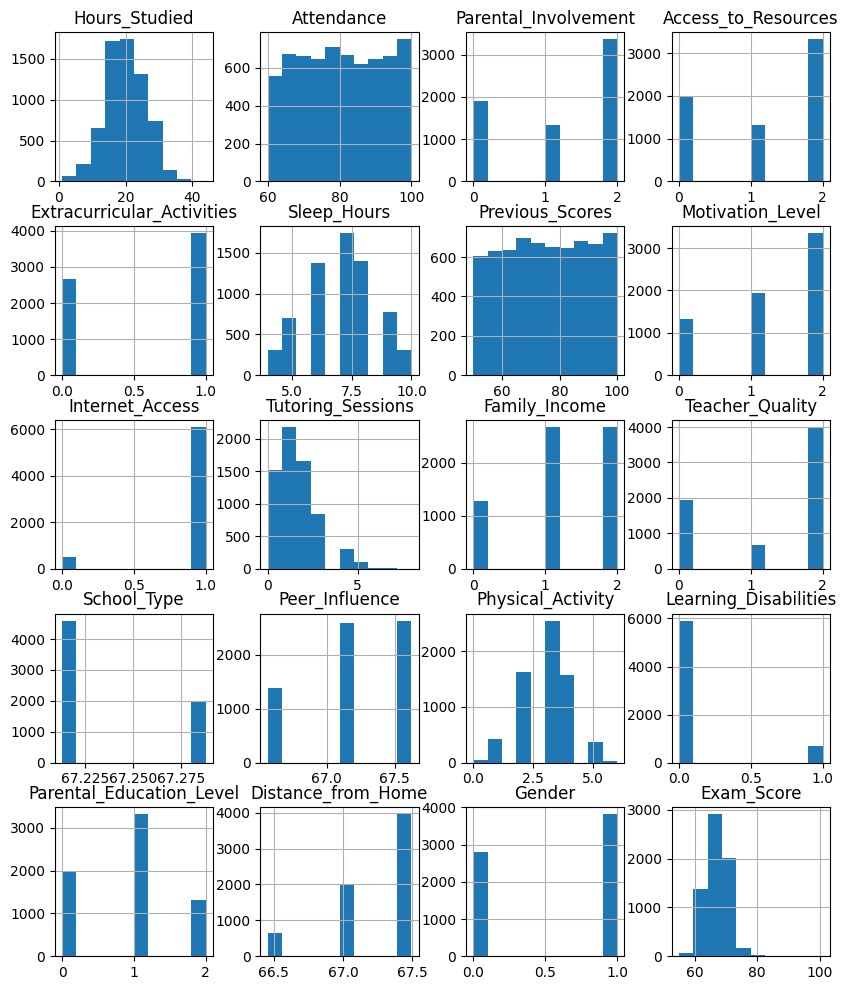

In [ ]:
# Plot histograms for all numeric features to understand data distribution
df.hist(figsize=(10, 12))
plt.show()

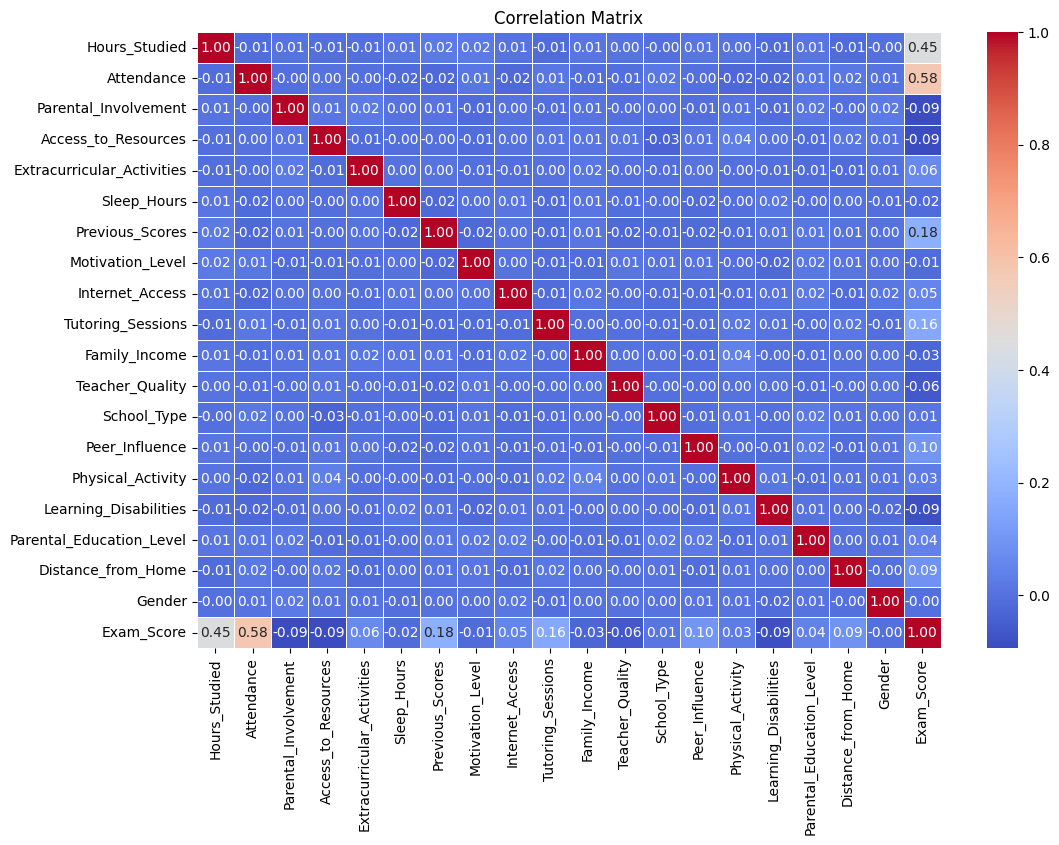

In [ ]:
# Visualize the correlation matrix
correlate_matrix = df.corr(numeric_only=True)
plt.figure(figsize=(12, 8))
sns.heatmap(correlate_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

In [ ]:
# Remove features with weak correlation to Exam_Score
df.drop(['Gender' , 'School_Type' , 'Sleep_Hours', 'Motivation_Level' ], axis=1, inplace=True)

#  LINEAR REGRESSION MODEL TRAINING

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Prepare features (X) and target (y)
x = df.drop(['Exam_Score'], axis=1)
y = df['Exam_Score']

# Split data into training (80%) and testing (20%) sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Initialize and train Linear Regression model
model = LinearRegression()
model.fit(x_train, y_train)

# Make predictions on test set
y_pred = model.predict(x_test)

# Evaluate performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)

Mean Squared Error: 4.414773007305248
R-squared: 0.6876724179716324


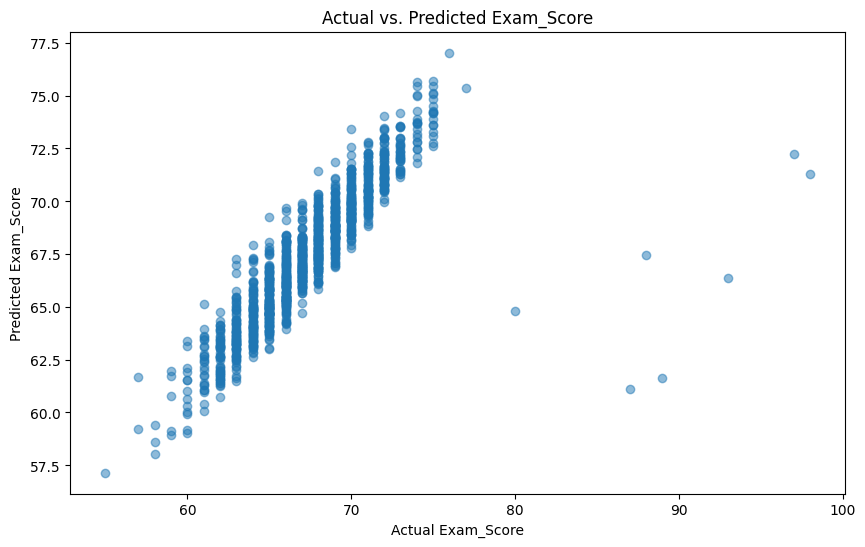

In [ ]:
# Visualize actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("Actual Exam_Score")
plt.ylabel("Predicted Exam_Score")
plt.title("Actual vs. Predicted Exam_Score")
plt.show()

# GRADIENT BOOSTING REGRESSION WITH HYPERPARAMETER TUNING

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV

# Re-prepare data (ensure consistency)
x = df.drop(['Exam_Score'], axis=1)
y = df['Exam_Score']

x_train_Gr, x_test_Gr, y_train_Gr, y_test_Gr = train_test_split(x, y, test_size=0.2, random_state=42)

# Define hyperparameter grid for GridSearchCV
param_grid = {
    'n_estimators': [50, 100],
    'learning_rate': [0.01, 0.1],
    'max_depth': [3],
    'random_state' : [42]
}

# Initialize Gradient Boosting Regressor
model = GradientBoostingRegressor()

# Perform Grid Search with 5-fold cross-validation
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, scoring='neg_mean_squared_error', cv=5)

# Fit grid search to training data
grid_search.fit(x_train_Gr, y_train_Gr)

# Extract best model
best_model = grid_search.best_estimator_

# Make predictions on test set
y_pred_Gr = best_model.predict(x_test_Gr)

# Evaluate performance
mse = mean_squared_error(y_test_Gr, y_pred_Gr)
r2 = r2_score(y_test_Gr, y_pred_Gr)

print("Mean Squared Error:", mse)
print("R-squared:", r2)

Mean Squared Error: 3.892909655440237
R-squared: 0.7245921686739925


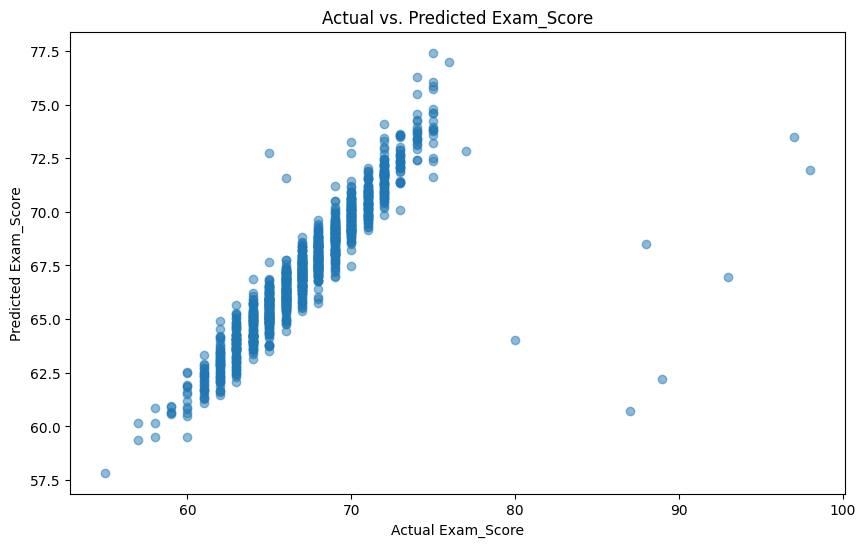

In [ ]:
# Visualize results
plt.figure(figsize=(10, 6))
plt.scatter(y_test_Gr, y_pred_Gr, alpha=0.5)
plt.xlabel("Actual Exam_Score")
plt.ylabel("Predicted Exam_Score")
plt.title("Actual vs. Predicted Exam_Score")
plt.show()

# POLYNOMIAL REGRESSION (SINGLE FEATURE: Hours_Studied)

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Test if non-linear relationship exists between Hours_Studied and Exam_Score
X = df[['Hours_Studied']]
y = df['Exam_Score']

# Create polynomial features of degree 2 (quadratic)
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)

# Train linear regression on polynomial features
model = LinearRegression()
model.fit(X_poly, y)

y_pred = model.predict(X_poly)

# Evaluate
print("MSE:", mean_squared_error(y, y_pred))
print("R²:", r2_score(y, y_pred))

MSE: 12.124706289359336
R²: 0.19880911931124312


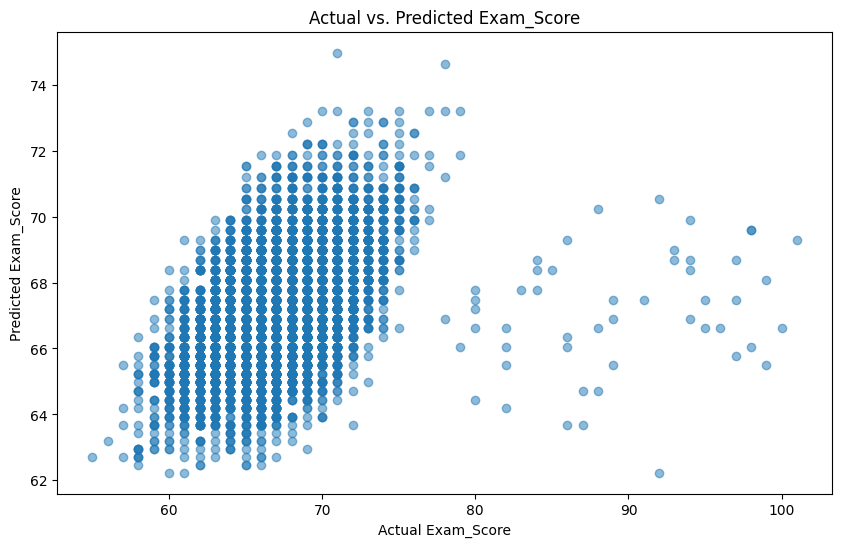

In [ ]:
# Visualize Result
plt.figure(figsize=(10, 6))
plt.scatter(y, y_pred, alpha=0.5)
plt.xlabel("Actual Exam_Score")
plt.ylabel("Predicted Exam_Score")
plt.title("Actual vs. Predicted Exam_Score")
plt.show()

# POLYNOMIAL REGRESSION (MULTIPLE FEATURES)

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Test polynomial expansion on multiple important features
X = df[['Hours_Studied', 'Teacher_Quality' , 'Attendance']]
y = df['Exam_Score']

# Generate polynomial features up to degree 2 (includes interactions)
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)

# Train model
model = LinearRegression()
model.fit(X_poly, y)

# Predict
y_pred_poly = model.predict(X_poly)

# Evaluate
print("MSE:", mean_squared_error(y, y_pred_poly))
print("R²:", r2_score(y, y_pred_poly))

MSE: 6.837193615144622
R²: 0.5482037219520379


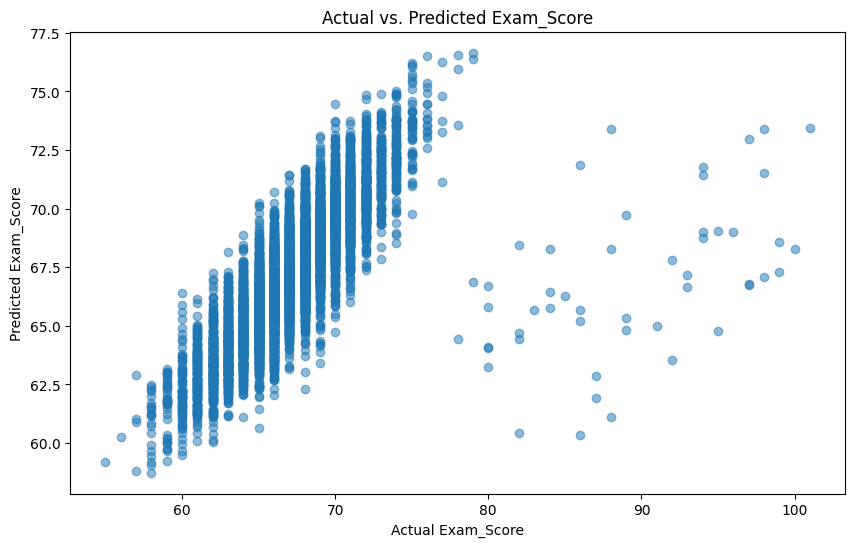

In [ ]:
# Visualize
plt.figure(figsize=(10, 6))
plt.scatter(y, y_pred_poly, alpha=0.5)
plt.xlabel("Actual Exam_Score")
plt.ylabel("Predicted Exam_Score")
plt.title("Actual vs. Predicted Exam_Score")
plt.show()